In [1]:
! pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 69.6 MB/s eta 0:00:00
   ━━━━

In [2]:
import pycaret
import pandas as pd
from pycaret.classification import *

pycaret.__version__

# Loading data
data = pd.read_csv('/content/gpsdata.csv')
print(data)

        PRN           DO            PD         RX          TOW            CP  \
0         6  1160.671408 -2.383595e+05  491568.00  491568.0008  -24660.26329   
1         6  1157.827808 -2.383639e+05  491568.02  491568.0208  -24683.46852   
2         6  1161.135932 -2.383686e+05  491568.04  491568.0408  -24706.68736   
3         6  1161.156617 -2.383734e+05  491568.06  491568.0608  -24729.92004   
4         6  1160.690893 -2.383781e+05  491568.08  491568.0808  -24753.15400   
...     ...          ...           ...        ...          ...           ...   
142935   16   979.133487  2.335063e+07  174156.32  174156.2421  -54761.37220   
142936    4   885.477474  2.338898e+07  174156.32  174156.2420  -49515.39664   
142937   27  4468.147391  2.656270e+07  174156.32  174156.2314 -242874.97140   
142938    3 -2498.976713  2.712717e+07  174156.32  174156.2295  104356.35440   
142939   26 -1605.122050  2.508356e+07  174156.32      17.0000           NaN   

                  EC            LC     

In [3]:
# Option 1: Remove the row with the missing value
data.dropna(subset=['Output'], inplace=True)

# initialization of set up

exp_clf = setup(data, target = 'Output')

print(exp_clf)

,Description,Value
0,Session id,5286
1,Target,Output
2,Target type,Multiclass
3,Original data shape,"(142939, 14)"
4,Transformed data shape,"(142939, 14)"
5,Transformed train set shape,"(100057, 14)"
6,Transformed test set shape,"(42882, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9998,0.9998,31.8460
gbc,Gradient Boosting Classifier,0.9999,0.0000,0.9999,0.9999,0.9999,0.9997,0.9997,278.9580
et,Extra Trees Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9997,0.9997,4.6180
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,1.8570
xgboost,Extreme Gradient Boosting,0.9996,1.0000,0.9996,0.9996,0.9996,0.9990,0.9990,5.4800
lightgbm,Light Gradient Boosting Machine,0.9995,1.0000,0.9995,0.9995,0.9995,0.9989,0.9989,31.3760
knn,K Neighbors Classifier,0.9923,0.9994,0.9923,0.9923,0.9923,0.9826,0.9826,1.6420
qda,Quadratic Discriminant Analysis,0.7863,0.0000,0.7863,0.8266,0.7941,0.5692,0.5807,0.2030
lda,Linear Discriminant Analysis,0.7468,0.0000,0.7468,0.7160,0.6840,0.1977,0.2612,0.1650
lr,Logistic Regression,0.7313,0.0000,0.7313,0.6257,0.6312,0.0669,0.1396,19.3210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=5286, verbose=0,
                       warm_start=False)

rf = create_model('rf')

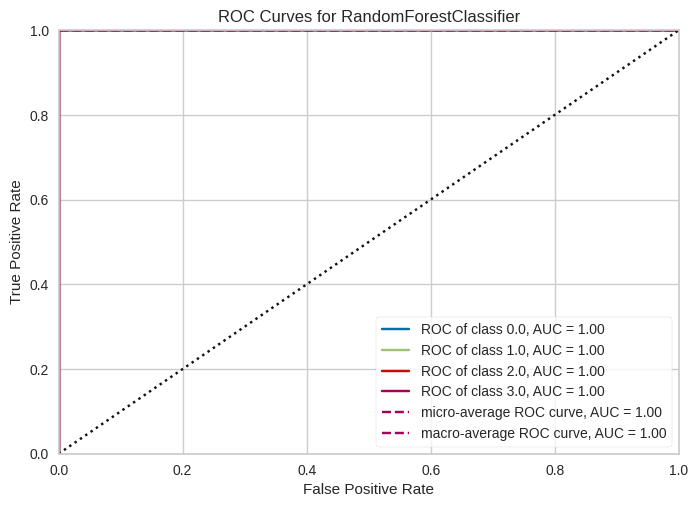

In [9]:
plot_model(rf, plot = 'auc')

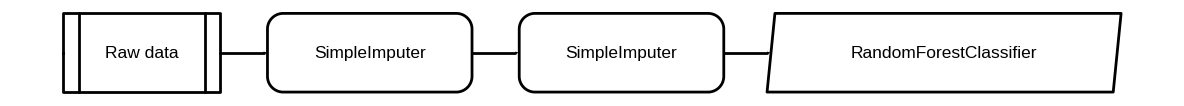

In [11]:
plot_model(rf, plot = 'pipeline')

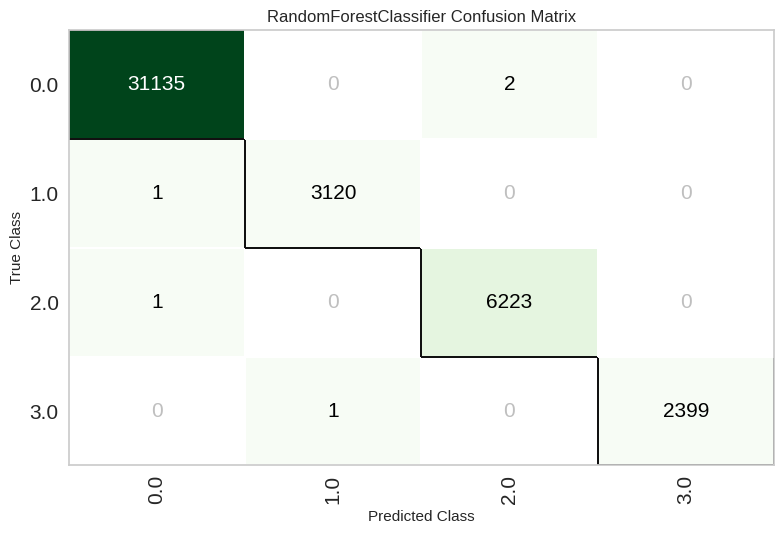

In [15]:
plot_model(rf, plot = 'confusion_matrix')

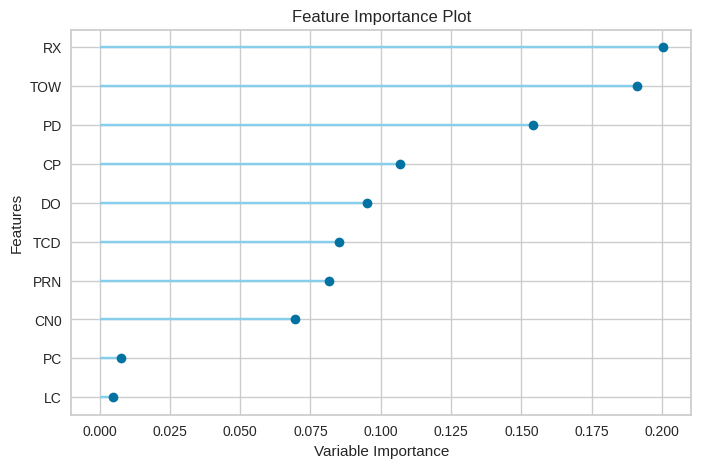

In [17]:
plot_model(rf, plot = 'feature')

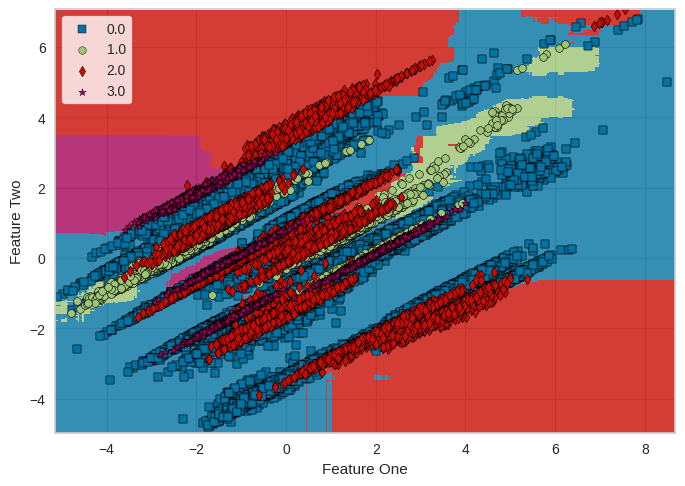

In [18]:
plot_model(rf, plot = "boundary")

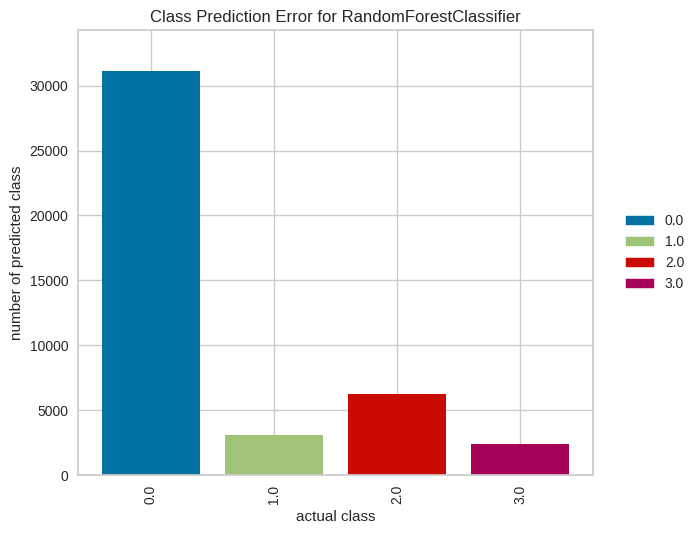

In [19]:
plot_model(rf, plot = "error")

In [24]:
save_model(rf, 'rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['PRN', 'DO', 'PD', 'RX', 'TOW',
                                              'CP', 'EC', 'LC', 'PC', 'PIP',
                                              'PQP', 'TCD', 'CN0'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerW...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
      